In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

import tensorflow as tf
from tensorflow import keras

In [4]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,MaxPool2D
from keras.layers import GlobalAveragePooling2D,Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [5]:

import pickle
import random

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

In [7]:
from keras.optimizers import Adam

learning_rate = 0.05  # Specify your desired learning rate
optimizer = Adam(learning_rate=learning_rate)

In [8]:
e=150
neurons=2048

In [9]:
class ImagesToDataset(object):

    def __init__(self,PATH='', IMAGE_SIZE = 300,SAVE_PATH=''):

        import os

        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE
        self.SAVE_PATH=''
        self.X_PATH=os.path.join(SAVE_PATH,'X_DATA')
        self.Y_PATH=os.path.join(SAVE_PATH,'Y_DATA')
        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                try:
                  for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)
                        image_data_temp=cv2.cvtColor(image_data_temp,cv2.COLOR_BGR2RGB)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE),interpolation=cv2.INTER_CUBIC)
                        # image_hist=cv2.calcHist([image_temp_resize],[0,1,2],None,[32,32,32],[0,256,0,256,0,256])
                        # cv2.normalize(image_hist,image_hist)
                       # hist_flatten=image_hist.flatten()
                        #image_flatten=image_temp_resize.flatten()
                        #print(image_temp_resize)
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        print("error in resizing")
                except:
                    print("error in loop")

            data = np.asanyarray(self.image_data,dtype=object)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1]) 
                # self.features.append(x[2])       # get the label

            X_Data = np.asarray(self.x_data,dtype='float32') / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)
            # Features=np.asarray(self.features)

            # reshape x_Data

            #X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data #, Features
        except:
            print("Failed to run Function Process Image ")
            return 0,0
            

    def pickle_image(self,name="train"):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.Process_Image()

        # Write the Entire Data into a Pickle File
        pickle_out = open(self.X_PATH + name,'wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open(self.Y_PATH + name, 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        # pickle_out = open('Features'+name, 'wb')
        # pickle.dump(Features, pickle_out)
        # pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data #,Features

    def load_dataset(self,name="train"):

        try:
            # Read the Data from Pickle Object
            X_Temp = open(self.X_PATH + name,'rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open(self.Y_PATH + name,'rb')
            Y_Data = pickle.load(Y_Temp)

            # Features_Temp = open('Features'+name,'rb')
            # Features = pickle.load(Features_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data #,Features

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data= self.pickle_image(name)
            return X_Data,Y_Data


In [10]:
data_set=ImagesToDataset(PATH="/content/drive/MyDrive/LumpyDataset",SAVE_PATH="/content/drive/MyDrive/")

In [11]:
x_data,y_data=data_set.load_dataset("LumpyDataset")

Reading Dataset from PIckle Object


In [12]:
y_data[0:10]

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
for i in range(0,len(y_data)):
  if(y_data[i]==0):
    y_data[i]=1
  else:
    y_data[i]=0

In [13]:
y_data[0:10]


array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [14]:
print(y_data.dtype)

int64


In [15]:
classes=['Lumpy Skin', 'Normal Skin']

In [16]:
len(y_data)

1296

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3, random_state=42)

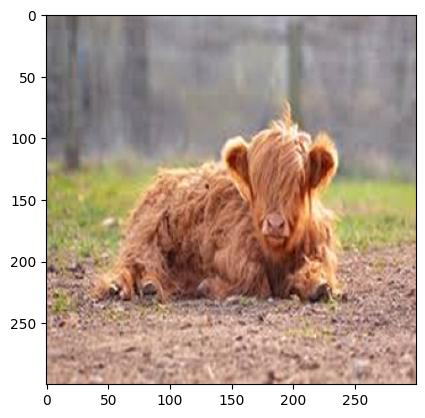

In [18]:
plt.imshow(x_train[100])

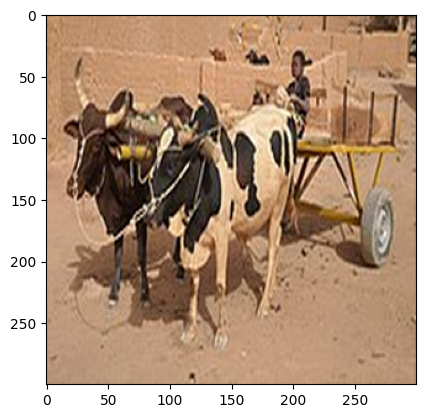

In [19]:
plt.imshow(x_test[10])

In [20]:
len(x_train)

907

In [21]:
len(y_train)

907

In [22]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [23]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications import InceptionV3

In [24]:
def VGG16_Model(fun):
  conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))
  model=Sequential()
  model.add(conv_base)
  model.add(Flatten())
  model.add(Dense(neurons,activation=fun))
  model.add(Dense(neurons,activation=fun))
  model.add(Dense(1,activation='sigmoid'))
  conv_base.trainable=False
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=e,validation_split=0.2)
  y_pred=model.predict(x_test)
  # print("y_pred",y_pred)
  y_pred2=y_pred.flatten()
  for i in range(0,len(y_pred2)):
    if(y_pred2[i]>=0.5):
      y_pred2[i]=1.0
    else:
      y_pred2[i]=0.0
  y_pred2=y_pred2.astype(np.int64)
  # print("y_pred2",y_pred2)
  y_vals[fun]=y_pred2
  cm=confusion_matrix(y_test,y_pred2)
  sns.heatmap(cm,annot=True,cmap='Blues', xticklabels=classes, yticklabels=classes)
  print(classification_report(y_test,y_pred2))


In [25]:
def VGG19_Model(fun):
  conv_base=VGG19(weights='imagenet',include_top=False,input_shape=(300,300,3))
  model=Sequential()
  model.add(conv_base)
  model.add(Flatten())
  model.add(Dense(neurons,activation=fun))
  #model.add(Dense(4096,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  conv_base.trainable=False
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=e,validation_split=0.2)
  y_pred=model.predict(x_test)
  # print("y_pred",y_pred)
  y_pred2=y_pred.flatten()
  for i in range(0,len(y_pred2)):
    if(y_pred2[i]>=0.5):
      y_pred2[i]=1.0
    else:
      y_pred2[i]=0.0
  y_pred2=y_pred2.astype(np.int64)
  # print("y_pred2",y_pred2)
  y_vals[fun]=y_pred2
  cm=confusion_matrix(y_test,y_pred2)
  sns.heatmap(cm,annot=True,cmap='Blues', xticklabels=classes, yticklabels=classes)
  print(classification_report(y_test,y_pred2))

In [26]:
def IV3_Model(fun):
  conv_base=InceptionV3(weights='imagenet',include_top=False,input_shape=(300,300,3))
  model=Sequential()
  model.add(conv_base)
  model.add(Flatten())
  model.add(Dense(neurons,activation=fun))
  #model.add(Dense(4096,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  conv_base.trainable=False
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=e,validation_split=0.2)
  y_pred=model.predict(x_test)
  # print("y_pred",y_pred)
  y_pred2=y_pred.flatten()
  for i in range(0,len(y_pred2)):
    if(y_pred2[i]>=0.5):
      y_pred2[i]=1.0
    else:
      y_pred2[i]=0.0
  y_pred2=y_pred2.astype(np.int64)
  # print("y_pred2",y_pred2)
  y_vals[fun]=y_pred2
  cm=confusion_matrix(y_test,y_pred2)
  sns.heatmap(cm,annot=True,cmap='Blues', xticklabels=classes, yticklabels=classes)
  print(classification_report(y_test,y_pred2))

In [27]:
def ROC(model_name):
  y_true = y_vals['org']
  y_prob_1 = y_vals['relu']
  y_prob_2 = y_vals['sigmoid']
  y_prob_3 = y_vals['tanh']
  y_prob_4 = y_vals['linear']

  fpr_1, tpr_1,_ = roc_curve(y_true, y_prob_1)
  fpr_2, tpr_2,_= roc_curve(y_true, y_prob_2)
  fpr_3, tpr_3,_= roc_curve(y_true, y_prob_3)
  fpr_4, tpr_4,_= roc_curve(y_true, y_prob_4)

  auc_1 = auc(fpr_1, tpr_1)
  auc_2 = auc(fpr_2, tpr_2)
  auc_3 = auc(fpr_3, tpr_3)
  auc_4 = auc(fpr_4, tpr_4)

  plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'ReLU (AUC = {auc_1:.2f})')
  plt.plot(fpr_2, tpr_2, color='green', lw=2, label=f'Sigmoid (AUC = {auc_2:.2f})')
  plt.plot(fpr_3, tpr_3, color='blue', lw=2, label=f'TanH (AUC = {auc_3:.2f})')
  plt.plot(fpr_4, tpr_4, color='red', lw=2, label=f'Linear (AUC = {auc_4:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic for' + model_name)
  plt.legend(loc="lower right")
  plt.show()

In [28]:
y_vals={'org':y_test}

58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/150
23/23 [==============================] - 15s 157ms/step - loss: 6.5615 - accuracy: 0.5986 - val_loss: 0.4195 - val_accuracy: 0.7802
Epoch 2/150
23/23 [==============================] - 1s 53ms/step - loss: 0.2956 - accuracy: 0.8938 - val_loss: 0.2747 - val_accuracy: 0.8901
Epoch 3/150
23/23 [==============================] - 1s 53ms/step - loss: 0.1520 - accuracy: 0.9476 - val_loss: 0.7676 - val_accuracy: 0.7363
Epoch 4/150
23/23 [==============================] - 1s 53ms/step - loss: 0.0967 - accuracy: 0.9683 - val_loss: 0.2772 - val_accuracy: 0.9176
Epoch 5/150
23/23 [==============================] - 1s 54ms/step - loss: 0.0516 - accuracy: 0.9890 - val_loss: 0.3258 - val_accuracy: 0.9121
Epoch 6/150
23/23 [==============================] - 1s 54ms/step - loss: 0.0338 - accuracy: 0.9931 - val_loss: 0.8262 - val_accuracy: 0.8132
Epoch 7/150
23/23 [==============================] - 1s 54ms/step - loss: 0.0398 

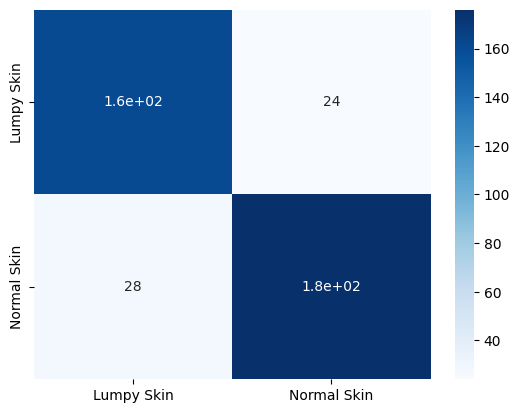

In [29]:
VGG16_Model("relu")

Epoch 1/150
23/23 [==============================] - 3s 70ms/step - loss: 2.0739 - accuracy: 0.4745 - val_loss: 0.6896 - val_accuracy: 0.5769
Epoch 2/150
23/23 [==============================] - 1s 53ms/step - loss: 0.7163 - accuracy: 0.5034 - val_loss: 0.7196 - val_accuracy: 0.4231
Epoch 3/150
23/23 [==============================] - 1s 53ms/step - loss: 0.6980 - accuracy: 0.4883 - val_loss: 0.6897 - val_accuracy: 0.5769
Epoch 4/150
23/23 [==============================] - 1s 53ms/step - loss: 0.7012 - accuracy: 0.5076 - val_loss: 0.7034 - val_accuracy: 0.4231
Epoch 5/150
23/23 [==============================] - 1s 54ms/step - loss: 0.7084 - accuracy: 0.4634 - val_loss: 0.6799 - val_accuracy: 0.5769
Epoch 6/150
23/23 [==============================] - 1s 54ms/step - loss: 0.7019 - accuracy: 0.5090 - val_loss: 0.7130 - val_accuracy: 0.4231
Epoch 7/150
23/23 [==============================] - 1s 53ms/step - loss: 0.7028 - accuracy: 0.4855 - val_loss: 0.6832 - val_accuracy: 0.5769
Epoch 

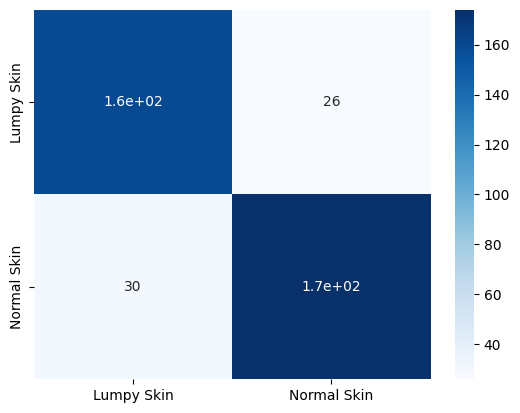

In [30]:
VGG16_Model("sigmoid")

Epoch 1/150
23/23 [==============================] - 3s 71ms/step - loss: 3.0646 - accuracy: 0.5021 - val_loss: 0.6850 - val_accuracy: 0.5769
Epoch 2/150
23/23 [==============================] - 1s 53ms/step - loss: 0.6995 - accuracy: 0.4910 - val_loss: 0.6900 - val_accuracy: 0.8736
Epoch 3/150
23/23 [==============================] - 1s 53ms/step - loss: 0.7091 - accuracy: 0.4966 - val_loss: 0.7141 - val_accuracy: 0.4231
Epoch 4/150
23/23 [==============================] - 1s 53ms/step - loss: 0.6882 - accuracy: 0.5752 - val_loss: 0.6548 - val_accuracy: 0.5769
Epoch 5/150
23/23 [==============================] - 1s 54ms/step - loss: 0.6445 - accuracy: 0.6428 - val_loss: 0.5980 - val_accuracy: 0.9066
Epoch 6/150
23/23 [==============================] - 1s 53ms/step - loss: 0.4970 - accuracy: 0.9090 - val_loss: 0.4461 - val_accuracy: 0.8571
Epoch 7/150
23/23 [==============================] - 1s 53ms/step - loss: 0.3533 - accuracy: 0.9324 - val_loss: 0.3407 - val_accuracy: 0.9066
Epoch 

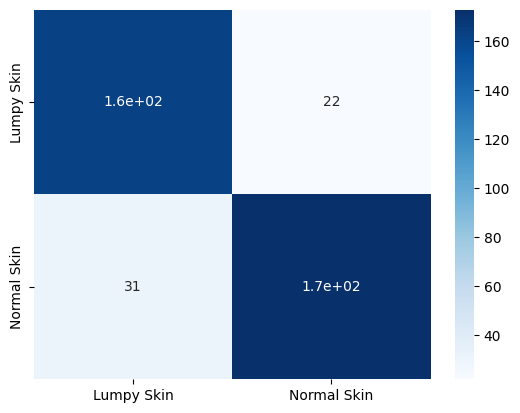

In [31]:
VGG16_Model("tanh")

Epoch 1/150
23/23 [==============================] - 3s 71ms/step - loss: 45.1635 - accuracy: 0.6097 - val_loss: 10.1145 - val_accuracy: 0.6209
Epoch 2/150
23/23 [==============================] - 1s 54ms/step - loss: 2.8155 - accuracy: 0.8083 - val_loss: 1.1053 - val_accuracy: 0.8736
Epoch 3/150
23/23 [==============================] - 1s 53ms/step - loss: 0.6945 - accuracy: 0.8897 - val_loss: 0.4504 - val_accuracy: 0.8462
Epoch 4/150
23/23 [==============================] - 1s 54ms/step - loss: 0.2734 - accuracy: 0.9324 - val_loss: 0.5804 - val_accuracy: 0.8297
Epoch 5/150
23/23 [==============================] - 1s 53ms/step - loss: 0.1269 - accuracy: 0.9586 - val_loss: 0.2930 - val_accuracy: 0.9011
Epoch 6/150
23/23 [==============================] - 1s 54ms/step - loss: 0.0640 - accuracy: 0.9903 - val_loss: 0.5301 - val_accuracy: 0.8846
Epoch 7/150
23/23 [==============================] - 1s 53ms/step - loss: 0.0309 - accuracy: 0.9917 - val_loss: 0.4263 - val_accuracy: 0.9066
Epoc

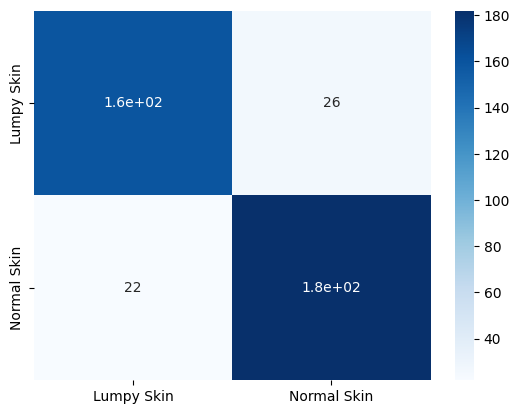

In [32]:
VGG16_Model("linear")

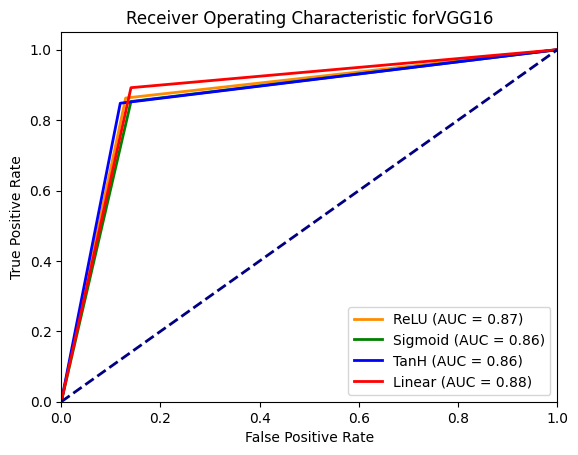

In [33]:
ROC("VGG16")

80134624/80134624 [==============================] - 4s 0us/step
Epoch 1/150
23/23 [==============================] - 3s 77ms/step - loss: 8.3760 - accuracy: 0.5890 - val_loss: 0.4404 - val_accuracy: 0.8407
Epoch 2/150
23/23 [==============================] - 1s 59ms/step - loss: 0.3300 - accuracy: 0.8717 - val_loss: 0.3818 - val_accuracy: 0.8791
Epoch 3/150
23/23 [==============================] - 1s 59ms/step - loss: 0.1742 - accuracy: 0.9297 - val_loss: 0.3842 - val_accuracy: 0.8516
Epoch 4/150
23/23 [==============================] - 1s 59ms/step - loss: 0.1095 - accuracy: 0.9655 - val_loss: 0.2806 - val_accuracy: 0.9121
Epoch 5/150
23/23 [==============================] - 1s 60ms/step - loss: 0.0584 - accuracy: 0.9834 - val_loss: 0.2734 - val_accuracy: 0.9066
Epoch 6/150
23/23 [==============================] - 1s 59ms/step - loss: 0.0416 - accuracy: 0.9917 - val_loss: 0.2700 - val_accuracy: 0.8956
Epoch 7/150
23/23 [==============================] - 1s 59ms/step - loss: 0.0292 - 

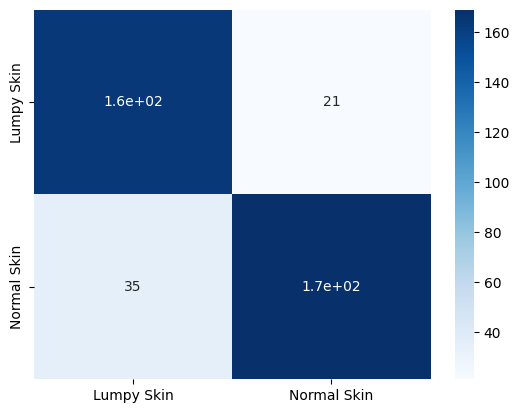

In [34]:
VGG19_Model("relu")

Epoch 1/150
23/23 [==============================] - 3s 77ms/step - loss: 9.3656 - accuracy: 0.4883 - val_loss: 3.2626 - val_accuracy: 0.5769
Epoch 2/150
23/23 [==============================] - 1s 60ms/step - loss: 1.6720 - accuracy: 0.4731 - val_loss: 0.8172 - val_accuracy: 0.4231
Epoch 3/150
23/23 [==============================] - 1s 60ms/step - loss: 0.7753 - accuracy: 0.5062 - val_loss: 0.8604 - val_accuracy: 0.4231
Epoch 4/150
23/23 [==============================] - 1s 60ms/step - loss: 0.7013 - accuracy: 0.5214 - val_loss: 0.6944 - val_accuracy: 0.4231
Epoch 5/150
23/23 [==============================] - 1s 59ms/step - loss: 0.6904 - accuracy: 0.5269 - val_loss: 0.7030 - val_accuracy: 0.4231
Epoch 6/150
23/23 [==============================] - 1s 60ms/step - loss: 0.6764 - accuracy: 0.6179 - val_loss: 0.6712 - val_accuracy: 0.8407
Epoch 7/150
23/23 [==============================] - 1s 60ms/step - loss: 0.6558 - accuracy: 0.7228 - val_loss: 0.6571 - val_accuracy: 0.8681
Epoch 

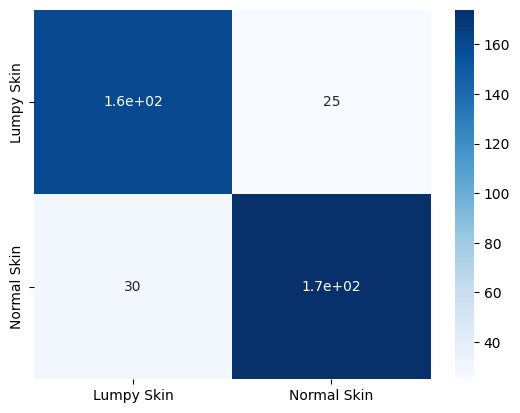

In [35]:
VGG19_Model("sigmoid")

Epoch 1/150
23/23 [==============================] - 3s 78ms/step - loss: 3.5385 - accuracy: 0.5034 - val_loss: 0.6002 - val_accuracy: 0.7088
Epoch 2/150
23/23 [==============================] - 1s 60ms/step - loss: 0.6166 - accuracy: 0.6772 - val_loss: 0.5165 - val_accuracy: 0.8297
Epoch 3/150
23/23 [==============================] - 1s 59ms/step - loss: 0.4420 - accuracy: 0.8759 - val_loss: 0.4569 - val_accuracy: 0.8516
Epoch 4/150
23/23 [==============================] - 1s 59ms/step - loss: 0.3637 - accuracy: 0.9062 - val_loss: 0.3879 - val_accuracy: 0.8791
Epoch 5/150
23/23 [==============================] - 1s 59ms/step - loss: 0.3005 - accuracy: 0.9269 - val_loss: 0.3384 - val_accuracy: 0.8626
Epoch 6/150
23/23 [==============================] - 1s 59ms/step - loss: 0.2513 - accuracy: 0.9421 - val_loss: 0.3177 - val_accuracy: 0.8956
Epoch 7/150
23/23 [==============================] - 1s 59ms/step - loss: 0.2047 - accuracy: 0.9517 - val_loss: 0.2843 - val_accuracy: 0.8901
Epoch 

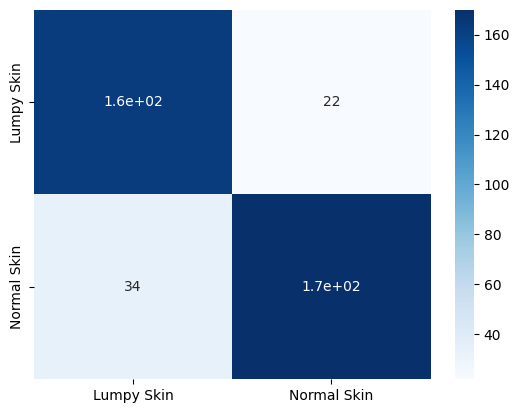

In [36]:
VGG19_Model("tanh")

Epoch 1/150
23/23 [==============================] - 3s 76ms/step - loss: 37.0491 - accuracy: 0.6262 - val_loss: 5.7513 - val_accuracy: 0.8297
Epoch 2/150
23/23 [==============================] - 1s 59ms/step - loss: 4.1972 - accuracy: 0.8662 - val_loss: 4.0870 - val_accuracy: 0.8407
Epoch 3/150
23/23 [==============================] - 1s 59ms/step - loss: 0.9955 - accuracy: 0.9283 - val_loss: 2.5743 - val_accuracy: 0.8242
Epoch 4/150
23/23 [==============================] - 1s 59ms/step - loss: 0.7890 - accuracy: 0.9159 - val_loss: 3.9728 - val_accuracy: 0.7582
Epoch 5/150
23/23 [==============================] - 1s 59ms/step - loss: 0.5929 - accuracy: 0.9200 - val_loss: 1.9363 - val_accuracy: 0.8187
Epoch 6/150
23/23 [==============================] - 1s 59ms/step - loss: 0.1676 - accuracy: 0.9683 - val_loss: 1.0992 - val_accuracy: 0.8901
Epoch 7/150
23/23 [==============================] - 1s 59ms/step - loss: 0.0323 - accuracy: 0.9931 - val_loss: 1.1065 - val_accuracy: 0.8846
Epoch

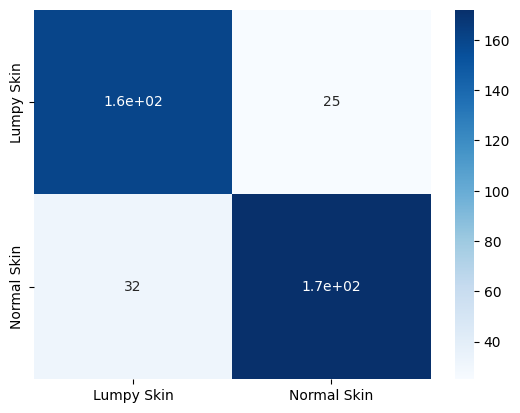

In [37]:
VGG19_Model("linear")

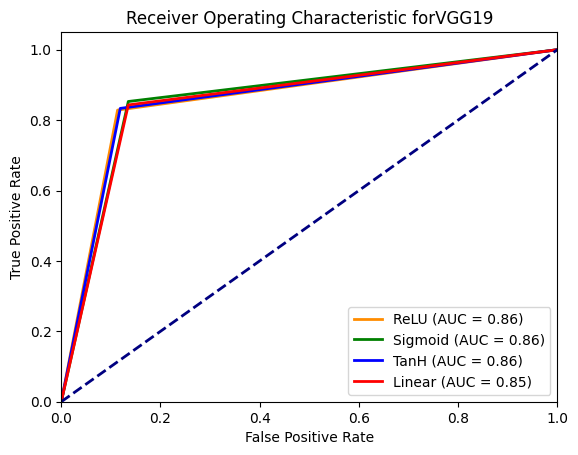

In [38]:
ROC("VGG19")

87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/150
23/23 [==============================] - 10s 174ms/step - loss: 16.2705 - accuracy: 0.7545 - val_loss: 1.7978 - val_accuracy: 0.9011
Epoch 2/150
23/23 [==============================] - 1s 42ms/step - loss: 1.8252 - accuracy: 0.9379 - val_loss: 1.5951 - val_accuracy: 0.8571
Epoch 3/150
23/23 [==============================] - 1s 43ms/step - loss: 1.5029 - accuracy: 0.9255 - val_loss: 1.6096 - val_accuracy: 0.9176
Epoch 4/150
23/23 [==============================] - 1s 42ms/step - loss: 0.8898 - accuracy: 0.9586 - val_loss: 1.8273 - val_accuracy: 0.8956
Epoch 5/150
23/23 [==============================] - 1s 42ms/step - loss: 0.2656 - accuracy: 0.9876 - val_loss: 1.7595 - val_accuracy: 0.9176
Epoch 6/150
23/23 [==============================] - 1s 42ms/step - loss: 0.0951 - accuracy: 0.9945 - val_loss: 1.5880 - val_accuracy: 0.9176
Epoch 7/150
23/23 [==============================] - 1s 42ms/step - loss: 0.2065

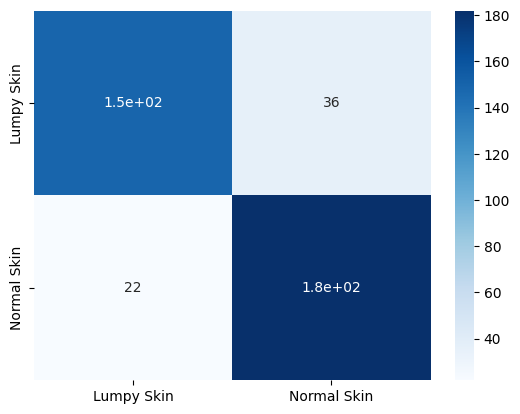

In [39]:
IV3_Model("relu")

Epoch 1/150
23/23 [==============================] - 7s 110ms/step - loss: 1.4337 - accuracy: 0.6717 - val_loss: 0.5019 - val_accuracy: 0.7802
Epoch 2/150
23/23 [==============================] - 1s 41ms/step - loss: 0.4274 - accuracy: 0.8028 - val_loss: 0.4073 - val_accuracy: 0.8571
Epoch 3/150
23/23 [==============================] - 1s 41ms/step - loss: 0.3644 - accuracy: 0.8497 - val_loss: 0.3532 - val_accuracy: 0.8791
Epoch 4/150
23/23 [==============================] - 1s 43ms/step - loss: 0.2969 - accuracy: 0.8993 - val_loss: 0.3020 - val_accuracy: 0.8791
Epoch 5/150
23/23 [==============================] - 1s 42ms/step - loss: 0.2577 - accuracy: 0.9117 - val_loss: 0.2793 - val_accuracy: 0.8791
Epoch 6/150
23/23 [==============================] - 1s 43ms/step - loss: 0.2269 - accuracy: 0.9297 - val_loss: 0.3107 - val_accuracy: 0.8791
Epoch 7/150
23/23 [==============================] - 1s 42ms/step - loss: 0.2083 - accuracy: 0.9310 - val_loss: 0.2552 - val_accuracy: 0.8901
Epoch

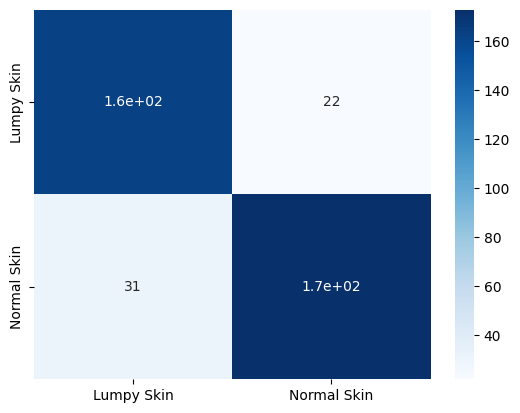

In [44]:
IV3_Model("sigmoid")

Epoch 1/150
23/23 [==============================] - 8s 135ms/step - loss: 4.4596 - accuracy: 0.5876 - val_loss: 0.7256 - val_accuracy: 0.5659
Epoch 2/150
23/23 [==============================] - 1s 42ms/step - loss: 0.5450 - accuracy: 0.7338 - val_loss: 0.4758 - val_accuracy: 0.7747
Epoch 3/150
23/23 [==============================] - 1s 42ms/step - loss: 0.4469 - accuracy: 0.7876 - val_loss: 0.4470 - val_accuracy: 0.7967
Epoch 4/150
23/23 [==============================] - 1s 43ms/step - loss: 0.4072 - accuracy: 0.8097 - val_loss: 0.4151 - val_accuracy: 0.8297
Epoch 5/150
23/23 [==============================] - 1s 42ms/step - loss: 0.3910 - accuracy: 0.8262 - val_loss: 0.3837 - val_accuracy: 0.8407
Epoch 6/150
23/23 [==============================] - 1s 42ms/step - loss: 0.3548 - accuracy: 0.8497 - val_loss: 0.3886 - val_accuracy: 0.8571
Epoch 7/150
23/23 [==============================] - 1s 41ms/step - loss: 0.3284 - accuracy: 0.8662 - val_loss: 0.3477 - val_accuracy: 0.8571
Epoch

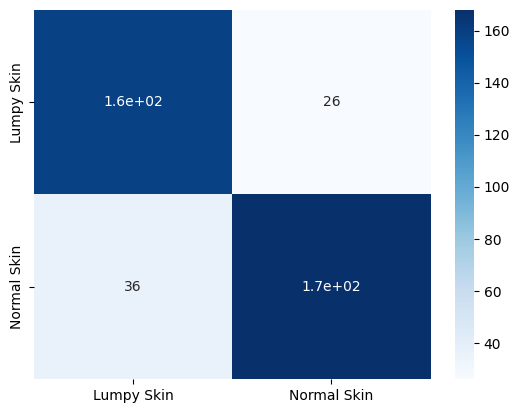

In [41]:
IV3_Model("tanh")

Epoch 1/150
23/23 [==============================] - 7s 109ms/step - loss: 143.5055 - accuracy: 0.6662 - val_loss: 19.7068 - val_accuracy: 0.8626
Epoch 2/150
23/23 [==============================] - 1s 41ms/step - loss: 18.4944 - accuracy: 0.8593 - val_loss: 7.0399 - val_accuracy: 0.9011
Epoch 3/150
23/23 [==============================] - 1s 42ms/step - loss: 3.2392 - accuracy: 0.9448 - val_loss: 2.9167 - val_accuracy: 0.9066
Epoch 4/150
23/23 [==============================] - 1s 42ms/step - loss: 0.5505 - accuracy: 0.9724 - val_loss: 3.6669 - val_accuracy: 0.8297
Epoch 5/150
23/23 [==============================] - 1s 41ms/step - loss: 0.1799 - accuracy: 0.9876 - val_loss: 2.0386 - val_accuracy: 0.9176
Epoch 6/150
23/23 [==============================] - 1s 42ms/step - loss: 0.0433 - accuracy: 0.9945 - val_loss: 2.2045 - val_accuracy: 0.9011
Epoch 7/150
23/23 [==============================] - 1s 42ms/step - loss: 0.0486 - accuracy: 0.9972 - val_loss: 1.9710 - val_accuracy: 0.9121
E

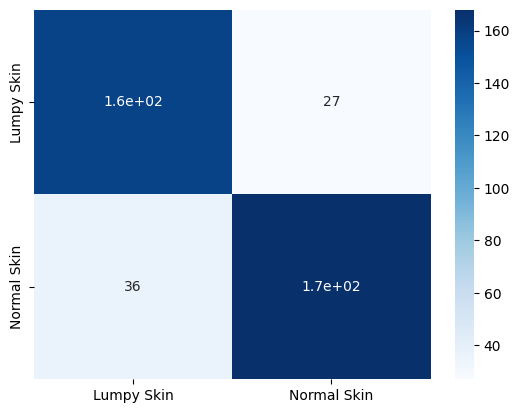

In [42]:
IV3_Model("linear")

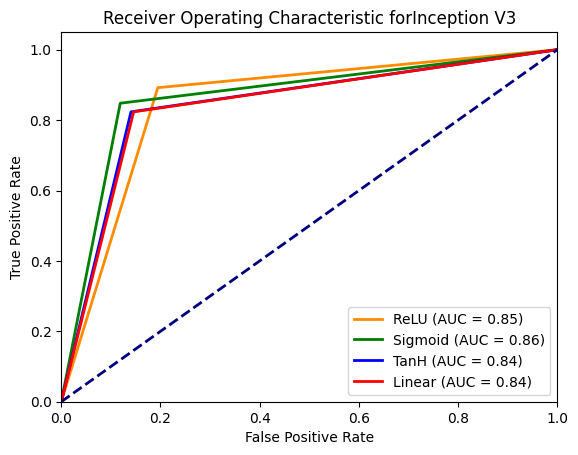

In [45]:
ROC("Inception V3")